## In this notebook, we will be creating random networks using the Erdos-Renyi model and studying various properties of the network


In [5]:
## Installing the required packages

install.packages("igraph")
install.packages("pracma")
library('igraph')
library('Matrix')
library('pracma')

install.packages('matrixStats')
library(matrixStats)


The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmpmx367u/downloaded_packages

The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmpmx367u/downloaded_packages



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu





The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmpmx367u/downloaded_packages


## Generating a random network using the Erdos-Renyi model and plotting it's degree distribution

In [2]:
# Generating the Erdos-Renyi network
num_nodes = 500
edge_prob = 0.003
erdos_graph = sample_gnp(num_nodes, edge_prob, directed = FALSE)

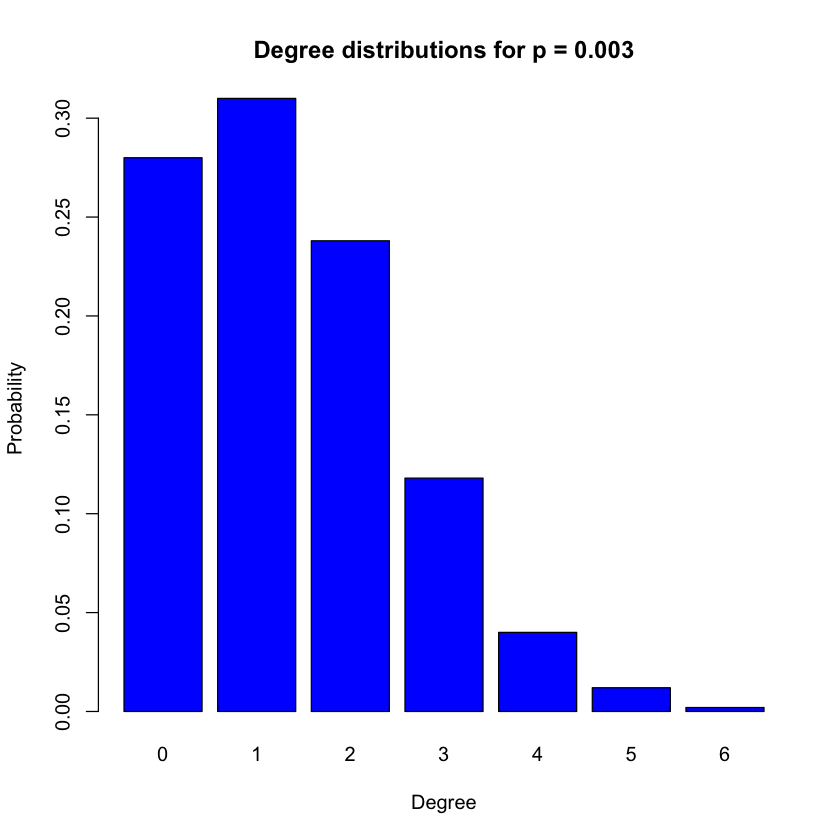

In [3]:
# Plotting the node degree distribution of the Erdos-Renyi network as a bar plot
node_deg_dist = degree.distribution(erdos_graph)
xVals = c(0: (length(node_deg_dist) - 1))
barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", edge_prob, sep = " "),col="blue")

In [4]:
## In Discussion 1 practice problem 1, we derived that the degree distribution follows a binomial distribution.
## For a binomial distribution, the mean is given by np and the variance is given by np(1-p)

analytical_mean = num_nodes * edge_prob
analytical_variance = num_nodes * edge_prob * (1-edge_prob)
simulated_mean = mean(degree(erdos_graph))
simulated_variance = var(degree(erdos_graph))
print(paste("Analytical mean of the degree distribution is",":", analytical_mean))
print(paste("Simulated mean of the degree distribution is",":", simulated_mean))
print(paste("Analytical variance of the  degree distribution is",":", analytical_variance))
print(paste("Simulated variance of the  degree distribution is",":", simulated_variance))

[1] "Analytical mean of the degree distribution is : 1.5"
[1] "Simulated mean of the degree distribution is : 1.372"
[1] "Analytical variance of the  degree distribution is : 1.4955"
[1] "Simulated variance of the  degree distribution is : 1.45652905811623"


## Analyzing the connectivity properties of the Erdos-Renyi network

In [5]:
# Checking the connectivity of the generated Erdos-Renyi network
connectivity = is_connected(erdos_graph)
print(connectivity)

[1] FALSE


In [6]:
## In Discussion 1 practice problem 2, we derived that Erdos-Renyi network is surely disconnected for p < ln(n)/n and
## is almost surely connected for p > ln(n)/n. In this cell, we generate 1000 realization of Erdos-Renyi network
## with 500 nodes and p = 0.003 and show that for all the realization the network is disconnected.

connectedCount_dis = 0
for(i in c(1:1000)) {
        temp_g = sample_gnp(500, 0.003, directed = FALSE)
        if(is_connected(temp_g)) {
            connectedCount_dis = connectedCount_dis + 1
        }
    }
connectivity_prob_dis = connectedCount_dis/1000
print(paste("Estimated connectivity probability for p =",0.003,":", connectivity_prob_dis))
gccDiameter = diameter(temp_g)
print(paste("diammeter is: ", gccDiameter))

## Now the threshold for connectvity for an Erdos-Renyi network with 500 nodes is ln(500)/500 ~ 0.012. We
## generate 1000 realization of Erdos-Renyi network
## with 500 nodes and p = 0.02 and show that P(network is connected) ~ 1

connectedCount_con = 0
for(j in c(1:1000)) {
        temp_g = sample_gnp(500, 0.02, directed = FALSE)
        if(is_connected(temp_g)) {
            connectedCount_con = connectedCount_con + 1
        }
    }
connectivity_prob_con = connectedCount_con/1000
print(paste("Estimated connxectivity probability for p =",0.02,":", connectivity_prob_con))



[1] "Estimated connectivity probability for p = 0.003 : 0"
[1] "diammeter is:  25"
[1] "Estimated connectivity probability for p = 0.02 : 0.98"


## Analyzing the Giant Connected Component (GCC) of an Erdos-Renyi network: A network is a set of nodes and a set of edges between nodes, this means that it is possible to have a network that is made up of several islands of nodes, where no connections exist between nodes on different islands. In Network theory these islands are called Components. For example in a social network we might see two separate groups of friends where there are no friendships between the groups, in this case we have two components. In many networks as the network grows the components get gradually connected together. At some point we can say that a significant proportion of the nodes are connected together in one Giant Component. In the Erdos-Renyi model, if p < 1/n then with high probability all the components have size order of log(n) and if p > 1/n then with high probability there is a single giant connected component (GCC) and all other components having a size order of log(n)

[1] "Analytical threshold at which GCC appears : 0.001"
[1] "Analytical threshold at which graph becomes connected : 0.00690775527898214"


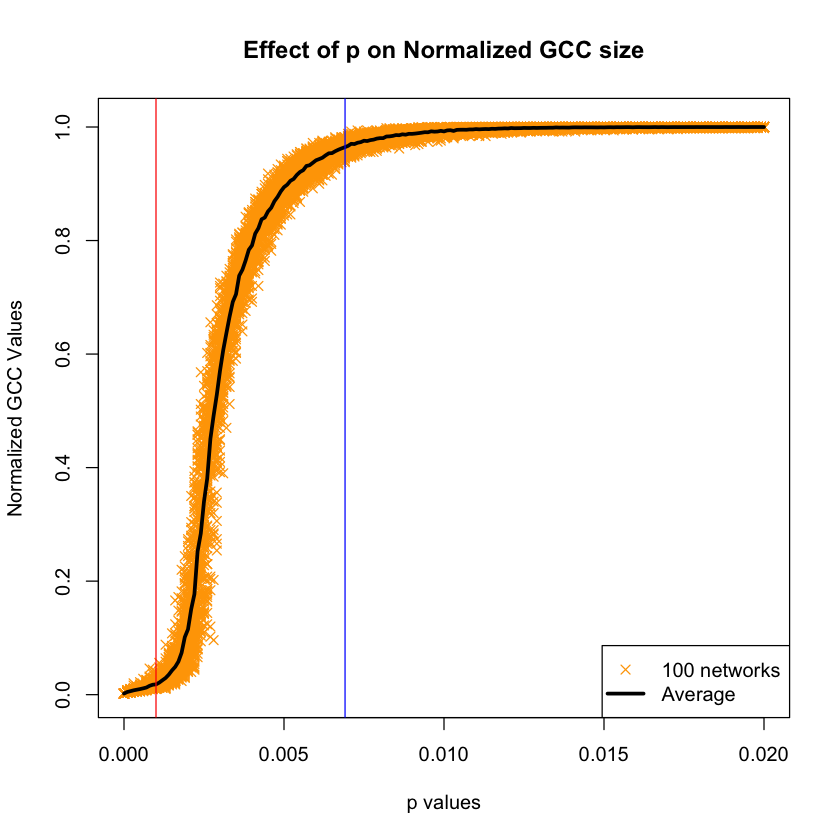

In [8]:
## We sweep p from 0 to 0.02 in increments of 0.0001 and for each value of p we generate 100 instances of the network
## using the Erdos-Renyi model. We compute the normalized GCC size (GCC size/500) for each instance and plot them as
## a scatter plot. We also plot the average value of normalized GCC (averaged over 100 instances) against p.


p_sweep = seq(0, 0.02, 0.0001)
avgVals = rep(0, length(p_sweep))
analytical_GCC_th = 1/1000
analytical_connectivity_th = log(1000)/1000

j = 1
plot(1, type = "n", xlab = "p values",
     ylab = "Normalized GCC Values", xlim = c(0, 0.02),
     main = "Effect of p on Normalized GCC size",
     ylim = c(0, 1.01))


for (p in p_sweep) {
    total = 0
    for (i in c(1:100)) {
        g = sample_gnp(num_nodes, p, directed = FALSE)
        comps = clusters(g)
        sz = max(comps$csize)
        normalizedGCC = sz / num_nodes
        total = total + normalizedGCC
        points(p, normalizedGCC, col= 'orange', pch=4)
    }
    avgVals[j] = total / 100
    j = j + 1
}

lines(p_sweep, avgVals, lwd=3.0)
abline(v=analytical_GCC_th, col="red")
abline(v=analytical_connectivity_th, col="blue")

legend(x = "bottomright",
       legend = c("100 networks", "Average"),  
       pch = c(4, NA),           
       lty = c(NA, 1),           
       lwd = c(NA, 3.0),
       col = c("orange", 1)
      )


print(paste("Analytical threshold at which GCC appears",":", analytical_GCC_th))
print(paste("Analytical threshold at which graph becomes connected",":", analytical_connectivity_th))

## Analyzing the relationship between the average GCC size and the number of nodes in the network when the average node degree is kept fixed

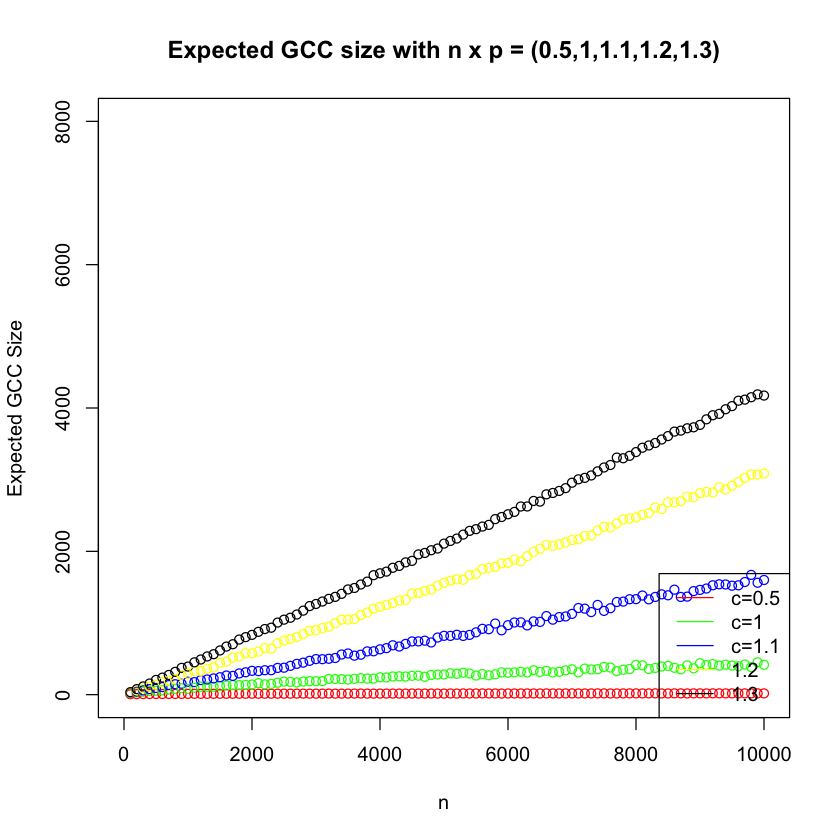

In [10]:
## In order to understand the relationship between the average GCC size and the number of nodes when the average node 
## degree is kept fixed, we perform the following experiment: (i) For a given average node degree,
## we sweep the network size from 100 to 10000 and for each network size we compute the average GCC size by averaging
## over 100 instances of the random network (ii) We repeat (i) for different average node degree (iii) We plot
## average GCC size as a function of network size

n_sweep = seq(100, 10000, 100)

c_sweep = c(0.5,1,1.1,1.2,1.3)
colors = c("red", "green", "blue","yellow","black")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 8000),
     main = "Expected GCC size with n x p = (0.5,1,1.1,1.2,1.3)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}

legend(x = "bottomright",
       legend = c("c=0.5", "c=1", "c=1.1", c="1.2",c="1.3"),             
       lty = c(1, 1, 1),           
       col = c("red", "green", "blue","yellow","black")
      )

# Question 2 


In [7]:
# 2a
num_nodes = 1000
m = 1
undirectedGraph = sample_pa(num_nodes, m, directed = FALSE)

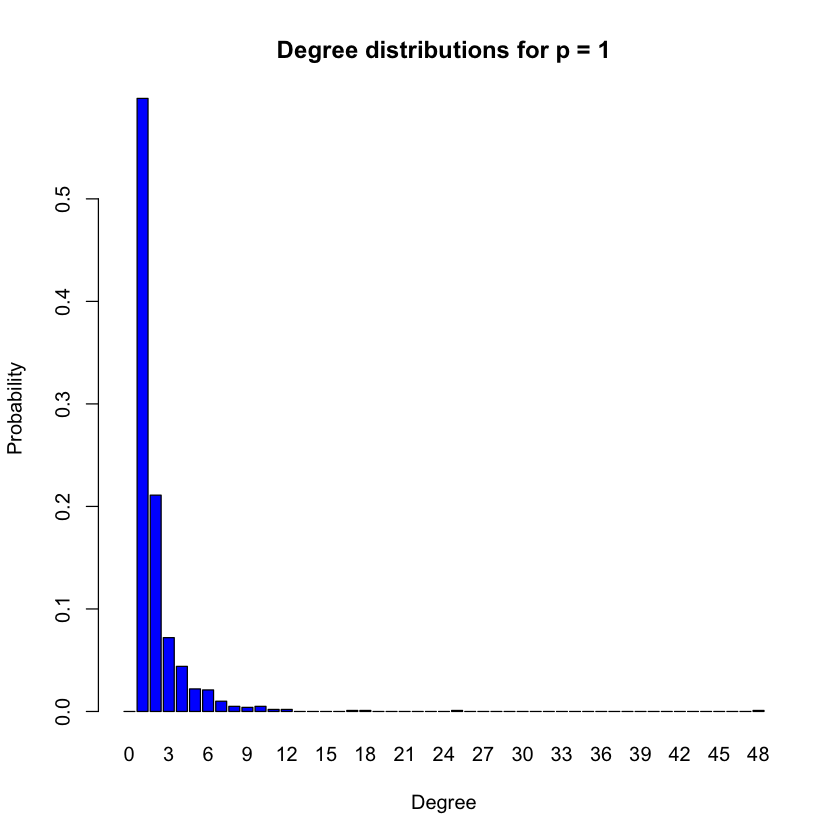

In [8]:
# Plotting the node degree distribution of the undirected network as a bar plot
node_deg_dist = degree.distribution(undirectedGraph)
xVals = c(0: (length(node_deg_dist) - 1))
barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", m, sep = " "),col="blue")

The network is always connected

In [13]:
clustered = cluster_fast_greedy(undirectedGraph, modularity = TRUE) # 2b
moduled = modularity(clustered)
print(moduled)

[1] 0.9300672


In [14]:
largerG = sample_pa(10000, m, directed = FALSE) #2c
moduled2 = modularity(cluster_fast_greedy(largerG, modularity = TRUE))
print(moduled2)

[1] 0.9784253
